![Astrofisica Computacional](../../logo.png)

---
## Archivos `.dat` + `ReadMe` 


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno se utiliza la librería `astropy.io` para leer una arcivo de datos de texto plano con extensión .dat (formato ascii) junto con un archivo adicional ReadMe que contiene los metadatos. 

---

## 1. Obtención y Lectura de los Datos

Consideraremos el conjunto de datos reportado Greene and Ho [2006], el cual contiene información de 88 galaxias cercanas. 

Greene, J. E. and Ho, L. C. *The MBH − σ∗ Relation in Local Active Galaxies*. ApJ 641 L21 (2006)
https://ui.adsabs.harvard.edu/abs/2006ApJ...641L..21G/abstract

El conjunto de datos está disponibele, en varios formatos en

http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/ApJ/641/L21.

Al hacer click en  el link ReadMe+ftp link se puede acceder a los datos via FTP.

---

### Abrir los archivos .dat+ReadMe.

Para acceder a la información del archivo plano .dat file (en formato ascii) y los metadatos en el archivo ReadMe se utilizará el comando  [astropy.io.ascii](https://docs.astropy.org/en/stable/io/ascii/)
 

In [2]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt



data = ascii.read('table1.dat', readme='ReadMe')
data

<Table length=88>
          Name              z      sigma* ...   E_logM    e_logM 
                                   km / s ... dex(Msun) dex(Msun)
         str24           float64  float64 ...  float64   float64 
------------------------ -------- ------- ... --------- ---------
SDSS J000805.62+145023.4   0.0454   140.0 ...        --       0.1
                     ...      ...     ... ...       ...       ...
                  POX 52   0.0218    36.0 ...        --       0.3
                NGC 4395 0.000947    30.0 ...        --       0.4

La longitud de la tabla es de 88 muestras y 12 características, incluyendo 'Name', 'z', 'sigma*', etc.

---
Es posible acceder a cada una de las características,

In [4]:
data['z']

<Column name='z' dtype='float64' description='Redshift' length=88>
  0.0454
  0.0419
  0.0456
  0.0772
     ...
  0.0172
  0.0163
  0.0218
0.000947

In [5]:
data['logL']

<MaskedColumn name='logL' dtype='float64' unit='[10-7W]' description='Log of H{alpha} luminosity in erg/s' length=88>
41.13
41.58
41.45
41.13
  ...
   --
   --
   --
   --

También se puede acceder a los datos completos de una muestra particular o un conjunto de muestras,

In [7]:
data[1]

<Row index=1>
          Name              z     sigma* e_sigma* n_sigma*  FWHM  e_FWHM   logL   e_logL    logM     E_logM    e_logM 
                                  km / s  km / s           km / s km / s [10-7W] [10-7W] dex(Msun) dex(Msun) dex(Msun)
         str24           float64 float64 float64    str1   int64  int64  float64 float64  float64   float64   float64 
------------------------ ------- ------- -------- -------- ------ ------ ------- ------- --------- --------- ---------
SDSS J004236.86-104921.8  0.0419    78.4     10.0       --   1960     97   41.58    0.14       6.7        --       0.1

In [6]:
data[[0,1,3,4]]

<Table length=4>
          Name              z     sigma* ...   E_logM    e_logM 
                                  km / s ... dex(Msun) dex(Msun)
         str24           float64 float64 ...  float64   float64 
------------------------ ------- ------- ... --------- ---------
SDSS J000805.62+145023.4  0.0454   140.0 ...        --       0.1
SDSS J004236.86-104921.8  0.0419    78.4 ...        --       0.1
SDSS J020459.25-080816.0  0.0772   121.0 ...        --       0.1
SDSS J020615.99-001729.1  0.0426   216.0 ...        --       0.1

Distribuiremos la información en un conjunto de arreglos de numpy,

In [7]:
z = np.array(data["z"])
sigma_star = np.array(data["sigma*"])
e_sigma_star = np.array(data["e_sigma*"])
logL = np.array(data["logL"])
e_logL = np.array(data["e_logL"])
logM = np.array(data["logM"])
e_logM = np.array(data["e_logM"])

## 2. Visualizar la información

Veamos diferentes combinaciones de características, buscando alguna clase de patrón de interés,

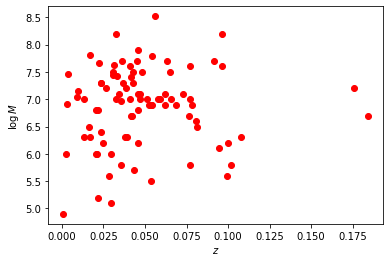

In [8]:
plt.scatter(z, logM,  color='red')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')
plt.show()

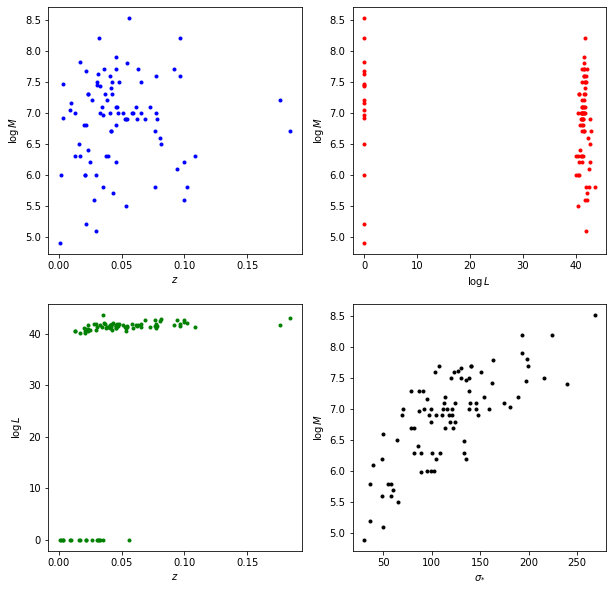

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(z, logM, 'b.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')

plt.subplot(222)
plt.plot(logL, logM, 'r.')
plt.xlabel(r'$\log L$')
plt.ylabel(r'$\log M$')

plt.subplot(223)
plt.plot(z, logL, 'g.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log L$')

plt.subplot(224)
plt.plot(sigma_star, logM, 'k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')

plt.show()

Aparecen alguna información o patrones intersantes. Por ejemplo,

- Se obsrevan dos puntos separados (outcaast) en el gráfico de $\log M$ vs $z$.
- Parece que existen dos cúmulos separados en el gráfico de $\log M$ vs $\log L$
- Parece que existen tres cúmulos separados (o dos cumulos y dos puntos separados) en el gráfico de  $\log L$ vs $z$
- Existe una tendencia de correlación en el gráfico de  $\log M$ vs $\sigma_{*}$

A pesar de que estos comportamientos parecen existir, algunos de ellos deben revisarse con cuidado. Por ejemplo, los aparentes cúmulos en las figuras 2 y 3 corresponden a una ausencia de datos, mal interpreata al convertir la información a arreglos. Al revisar la información en $\log L$ se tiene

In [10]:
logL

array([41.13, 41.58, 41.45, 41.13, 41.91, 41.24, 41.58, 40.45, 41.63,
       41.67, 40.14, 40.42, 41.17, 41.31, 41.27, 40.72, 41.14, 40.8 ,
       41.46, 41.74, 41.51, 41.65, 41.17, 41.66, 40.1 , 41.57, 41.3 ,
       40.92, 41.62, 41.86, 40.58, 40.62, 41.81, 41.55, 41.62, 41.23,
       41.29, 41.1 , 41.84, 40.73, 40.46, 41.18, 42.09, 41.4 , 41.51,
       41.41, 41.86, 41.09, 40.99, 41.92, 41.24, 41.41, 41.83, 41.21,
       41.65, 41.87, 42.57, 41.93, 42.03, 40.47, 42.14, 42.68, 42.57,
       42.35, 42.75, 41.87, 42.67, 42.19, 41.22, 42.96, 43.61,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

donde se observa una gran cantidad de valores $0.$ que en realidad correspondian a datos ausentes en el conjunto inicial. Estos valores de cero fueron incorporados al utilizar el comando `logL = np.array(data["logL"])`. 

NOTA: Es importante manjear adecuadamente la ausencia de datos!

---
Por otra parte, podemos analizar con mayor detalle la aparente correlación entre  $\log M$ y $\sigma_{*}$

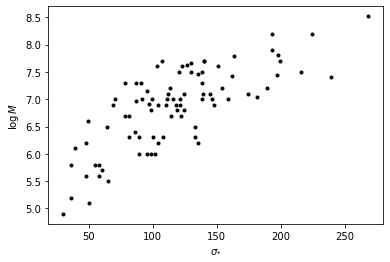

In [11]:
plt.plot(sigma_star, logM,  'k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

Puede parecer una dependencia lineal entre las dos variables. Sin embargo, para tener una mejor apreciación, incluiremos las barras de error. Para ello utilizamos la función [matplotlib.pyplot.errorbar](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.errorbar.html)

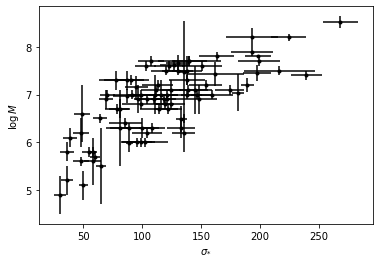

In [12]:
plt.errorbar(sigma_star, logM, e_logM, e_sigma_star, fmt='k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

Esta visualización miestra una correlación no-lineal. Para comprobarlo, podemos modificar la gráfica incluyendo el logaritmo de la dispersion de velocidades, $\log M$ vs $\log \sigma_{*}$,con lo cual la tendencia lineal es evidente,

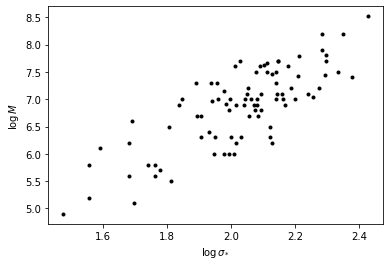

In [13]:
plt.plot(np.log10(sigma_star), logM,  'k.')
plt.xlabel(r'$\log \sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

Para confirmar esta apreciación, incluimos nuevamente las incertidumbres asociadas. Para ello es necesario recordar la propagación de errores,

\begin{align}
f(x) =& \log_{10} x = \frac{\ln x}{\ln 10}\\
\Delta f = &\frac{1}{\ln 10} \frac{\Delta x}{x}
\end{align}

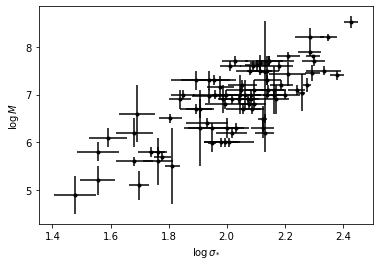

In [14]:

e_log_sigma = e_sigma_star/(np.log(10.)*sigma_star)


plt.errorbar(np.log10(sigma_star), logM, e_logM, e_log_sigma, fmt='k.')
plt.xlabel(r'$\log \sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

Luego volveremos sobre este conjunto de datos para analizar mejor esta relación.